In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


In [10]:
def annotate_upper_left(ax, text, annotation_offset=(-50, 30)):    
    ax.annotate(text, xy=(0, 1), xycoords='axes fraction', fontsize=18,
        xytext=annotation_offset, textcoords='offset points',
        ha='left', va='top')

In [11]:
f = np.load('../output/components_results.npz')

flipped_idx = f['flipped_idx']
influences = f['influences']
influences_without_train_error = f['influences_without_train_error']
influences_without_hessian = f['influences_without_hessian']
influences_without_both = f['influences_without_both']
test_image = f['test_image']
harmful_train_image = f['harmful_train_image']

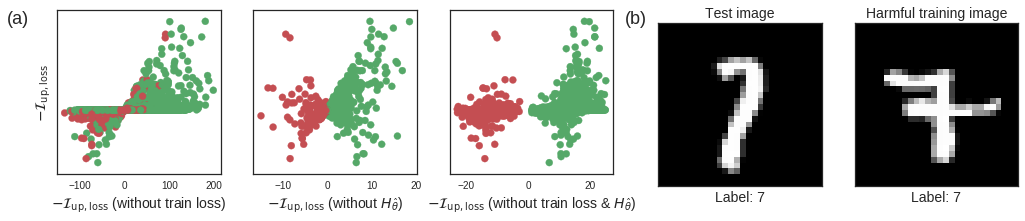

In [132]:
sns.set_style('white')

color_vec = np.array(['g'] * len(flipped_idx))
color_vec[flipped_idx] = 'r'
color_vec = list(color_vec)

fig = plt.figure(figsize=(17, 3))
ax = fig.add_subplot(1, 5, 1)
axs = [ax] + [fig.add_subplot(1, 5, i, sharey=ax) for i in [2, 3]]
ax = fig.add_subplot(1, 5, 4)
axs = axs + [ax] + [fig.add_subplot(1, 5, 5)]
    
axs[0].scatter(influences_without_train_error, influences, c=color_vec)
axs[0].set_xlabel('$-\mathcal{I}_\mathrm{up, loss}$ (without train loss)', fontsize=14)
axs[0].set_ylabel('$-\mathcal{I}_\mathrm{up, loss}$', fontsize=14)
annotate_upper_left(axs[0], '(a)', (-40, 0))

axs[1].scatter(influences_without_hessian, influences, c=color_vec)
# axs[1].set_xlabel('Influence (no $H$)')
axs[1].set_xlabel('$-\mathcal{I}_\mathrm{up, loss}$ (without $H_{\hat\\theta}$)', fontsize=14)

axs[2].scatter(influences_without_both, influences, c=color_vec)
# axs[2].set_xlabel('Influence (no train error and $H$)')
axs[2].set_xlabel('$-\mathcal{I}_\mathrm{up, loss}$ (without train loss & $H_{\hat\\theta}$)', fontsize=14)

axs[3].imshow(np.reshape(test_image, (28, 28)), cmap='gray', interpolation='none')
axs[3].set_title('Test image', fontsize=14)
axs[3].set_xlabel('Label: 7', fontsize=14)
annotate_upper_left(axs[2], '(b)', (175, 0))

axs[4].imshow(np.reshape(harmful_train_image, (28, 28)), cmap='gray', interpolation='none')
axs[4].set_title('Harmful training image', fontsize=14)
axs[4].set_xlabel('Label: 7', fontsize=14)

for ax in axs[:3]:
    plt.setp(ax.get_yticklabels(), visible=False)
    
for ax in axs[3:]:
    bbox = ax.get_position()
    bbox.y0 -= 0.06
    bbox.y1 -= 0.06
    bbox.x0 += 0.01
    bbox.x1 += 0.01
    ax.set_position(bbox)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

# plt.savefig(
#     '../figs/fig-components.png', 
#     dpi=600, bbox_inches='tight')